In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from unidecode import unidecode
from tqdm import tqdm

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
df = pd.read_csv('/kaggle/input/eng-ru-title-text/eng_title_text_url.csv', sep='\t')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,title,text,url
0,0,0,'It's definitely weird:' How the Redskins are ...,"From noon to 2 p.m., Jonathan Allen sits in ...",https://www.washingtontimes.com/news/2020/may/...
1,1,2,I had to raise funds to play in All England: M...,"Hyderabad: Way back in 1981, as an 11-year-ol...",https://telanganatoday.com/i-had-to-raise-fund...
2,2,3,Lexar launches NM700 NVMe M.2 series with spee...,"The PCIe Gen3x4 drive features 3D NAND, LDPC a...",https://www.notebookcheck.net/Lexar-launches-N...
3,3,4,"For a Limited Time, Down N’ Out Is Flipping Bu...","When coronavirus shut down the city, Down N’ O...",https://www.broadsheet.com.au/sydney/food-and-...
4,4,7,Full Text: Akufo-Addo’s speech at 2020 virtual...,Click to read all about coronavirus → \n ...,https://www.ghanaweb.com/GhanaHomePage/NewsArc...
...,...,...,...,...,...
48734,48734,109102,Trump says terminating U.S. relationship with ...,U.S. President Donald Trump on Friday said he ...,https://www.unian.info/world/u-s-relations-wit...
48735,48735,109105,"Report: UFC, Reebok could ‘part ways’ as contr...",The sponsorship deal between Ultimate Fighting...,https://www.mmamania.com/2020/5/29/21274980/re...
48736,48736,109106,U.S. Oil Production Rebound Off The Lows With ...,Summary \n Welcome to the US oil produ...,https://seekingalpha.com/article/4351002-u-s-o...
48737,48737,109108,Former Chicago Bears star S Roosevelt Taylor d...,May 29 (UPI) -- Former Chicago Bears star de...,https://www.upi.com/Sports_News/NFL/2020/05/29...


In [4]:
df.dropna(inplace=True)

In [5]:
from unidecode import unidecode
df['title'] = df['title'].apply(unidecode)
df['text'] = df['text'].apply(unidecode)
df

,Unnamed: 0,Unnamed: 0.1,title,text,url
0,0,0,'It's definitely weird:' How the Redskins are ...,"From noon to 2 p.m., Jonathan Allen sits in ...",https://www.washingtontimes.com/news/2020/may/...
1,1,2,I had to raise funds to play in All England: M...,"Hyderabad: Way back in 1981, as an 11-year-ol...",https://telanganatoday.com/i-had-to-raise-fund...
2,2,3,Lexar launches NM700 NVMe M.2 series with spee...,"The PCIe Gen3x4 drive features 3D NAND, LDPC a...",https://www.notebookcheck.net/Lexar-launches-N...
3,3,4,"For a Limited Time, Down N' Out Is Flipping Bu...","When coronavirus shut down the city, Down N' O...",https://www.broadsheet.com.au/sydney/food-and-...
4,4,7,Full Text: Akufo-Addo's speech at 2020 virtual...,Click to read all about coronavirus - \n ...,https://www.ghanaweb.com/GhanaHomePage/NewsArc...
...,...,...,...,...,...
48734,48734,109102,Trump says terminating U.S. relationship with ...,U.S. President Donald Trump on Friday said he ...,https://www.unian.info/world/u-s-relations-wit...
48735,48735,109105,"Report: UFC, Reebok could 'part ways' as contr...",The sponsorship deal between Ultimate Fighting...,https://www.mmamania.com/2020/5/29/21274980/re...
48736,48736,109106,U.S. Oil Production Rebound Off The Lows With ...,Summary \n Welcome to the US oil produ...,https://seekingalpha.com/article/4351002-u-s-o...
48737,48737,109108,Former Chicago Bears star S Roosevelt Taylor d...,May 29 (UPI) -- Former Chicago Bears star de...,https://www.upi.com/Sports_News/NFL/2020/05/29...


In [6]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=0de610853486e846c0649e374cfda4063226341572a8b63741af60fb22b7dbfc
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence_transformers


In [7]:
import torch 
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import random
from nltk.corpus import words
import nltk
import re

# download the list of English words
nltk.download('words')
word_list = words.words()

# define a function to generate random words from the English word list
def generate_random_word():
    return random.choice(word_list)

#not used in this run
def extract_first_five_sentences(text):
    # Split the text into sentences using a regular expression pattern
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    first_five_sentences = sentences[:5]
    result = ' '.join(first_five_sentences)
    return result

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1').to(device)    
embeddings_title = []
embeddings_text = []
for index, row in tqdm(df.iterrows()):
    title = row['title']
    text = row['text']
    #r = np.random.randint(0, 2)
    #if r == 0:
    #if len(title) < len(text):
            # Duplicate the title to match the length of the text
            #title *= len(text) // len(title)
       # text = extract_first_five_sentences(text)
        
    embeddings_title.append(model.encode(title,  show_progress_bar=False))
    embeddings_text.append(model.encode(text,  show_progress_bar=False))
embeddings_title = np.concatenate(embeddings_title, axis=0)
embeddings_text = np.concatenate(embeddings_text, axis=0)

[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


48502it [17:35, 45.96it/s]


In [8]:
embeddings_title = embeddings_title.reshape((768, -1))
embeddings_text = embeddings_text.reshape((768, -1))

In [9]:
df_val = pd.read_csv('/kaggle/input/valid-short-text-long-text/val_sentences.csv', sep='\t')
embeddings_short_val = []
embeddings_long_val = []
df_val.dropna(inplace=True)
for index, row in tqdm(df_val.iterrows()):
    embeddings_short_val.append(model.encode(row['Smaller Sentence'],  show_progress_bar=False))
    embeddings_long_val.append(model.encode(row['Bigger Sentence'],  show_progress_bar=False))
embeddings_short_val = np.concatenate(embeddings_short_val, axis=0)
embeddings_long_val = np.concatenate(embeddings_long_val, axis=0)

99it [00:01, 68.06it/s]


In [10]:
embeddings_short_val = embeddings_short_val.reshape(768, -1)
embeddings_long_val = embeddings_long_val.reshape(768, -1)

In [11]:
concatenated_val = np.concatenate((embeddings_short_val, embeddings_long_val))
concatenated_val.shape

(1536, 99)

In [12]:
concatenated_val_reverse = np.concatenate((embeddings_long_val, embeddings_short_val))
concatenated_val_reverse.shape

(1536, 99)

In [13]:
(embeddings_title.shape, embeddings_text.shape)

((768, 48502), (768, 48502))

<AxesSubplot:ylabel='Count'>

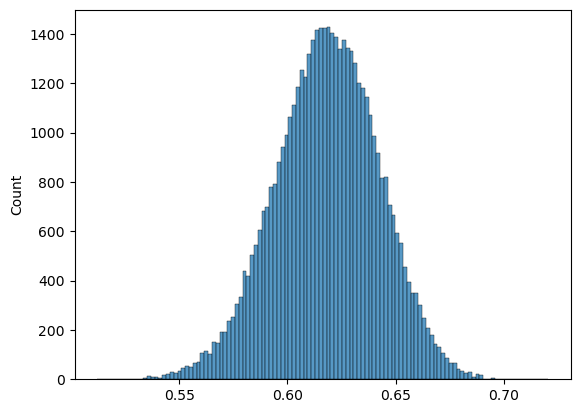

In [14]:
dot_product = np.sum(embeddings_title.T * embeddings_text.T, axis=1)

# Compute the norms of embeddings_title and embeddings_text
norm_title = np.sqrt(np.sum(embeddings_title.T ** 2, axis=1))
norm_text = np.sqrt(np.sum(embeddings_text.T ** 2, axis=1))

# Compute the cosine similarity between each pair of embeddings
cos_sim = dot_product / (norm_title * norm_text)

sns.histplot(cos_sim)

In [15]:
def cosine_sim (v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

randomly_concatenated = []
full_embeds = []
for i in range(48502):
    x = np.concatenate((embeddings_text[:, i], embeddings_title[:, i]))
    full_embeds.append(x)
    randomly_concatenated.append(0)
    x = np.concatenate((embeddings_title[:, i], embeddings_text[:, i]))
    full_embeds.append(x)
    randomly_concatenated.append(1)
        
i = 0
while i < 24000:
    a = np.random.randint(0, 48502)
    b = np.random.randint(0, 48502)
    if (cosine_sim(embeddings_text[:, a], embeddings_text[:, b]) > 0.2):
        continue
    x = np.concatenate((embeddings_text[:, a], embeddings_text[:, b]))
    full_embeds.append(x)
    randomly_concatenated.append(2)
    i += 1
    
i = 0
while i < 24000:
    a = np.random.randint(0, 48502)
    b = np.random.randint(0, 48502)
    if (cosine_sim(embeddings_title[:, a], embeddings_title[:, b]) > 0.2):
        continue
    x = np.concatenate((embeddings_title[:, a], embeddings_title[:, b]))
    full_embeds.append(x)
    randomly_concatenated.append(2)
    i += 1

По существу получилось, что у нас 24 тысячи нулей, единиц и двоек.

In [16]:
randomly_concatenated = np.array(randomly_concatenated)
full_embeds = np.array(full_embeds)

In [17]:
(randomly_concatenated.shape, full_embeds.shape)

((145004,), (145004, 1536))

<AxesSubplot:ylabel='Count'>

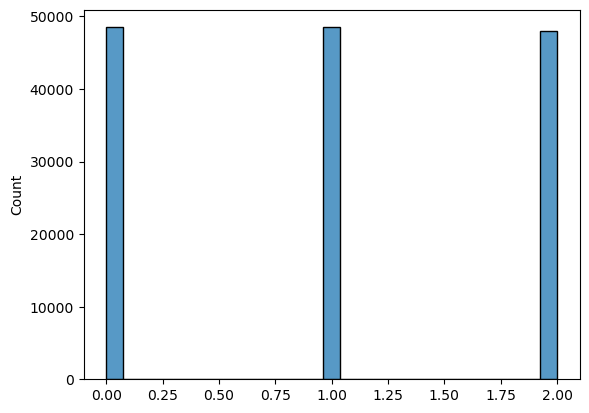

In [18]:
sns.histplot(randomly_concatenated)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(full_embeds, randomly_concatenated, test_size=0.2, random_state=42,stratify=randomly_concatenated)

# create the models
lr = LogisticRegression()

# fit the models to the training data and print the accuracy score for each model on the test set
lr.fit(X_train, y_train)
accuracy_lr = lr.score(X_test, y_test)
print("Logistic Regression Accuracy on test set: {:.2f}%".format(accuracy_lr * 100))

Logistic Regression Accuracy on test set: 50.14%


Epoch 23 - Train Loss: 0.6192 - Test Loss: 0.6883 - Accuracy: 86.66%


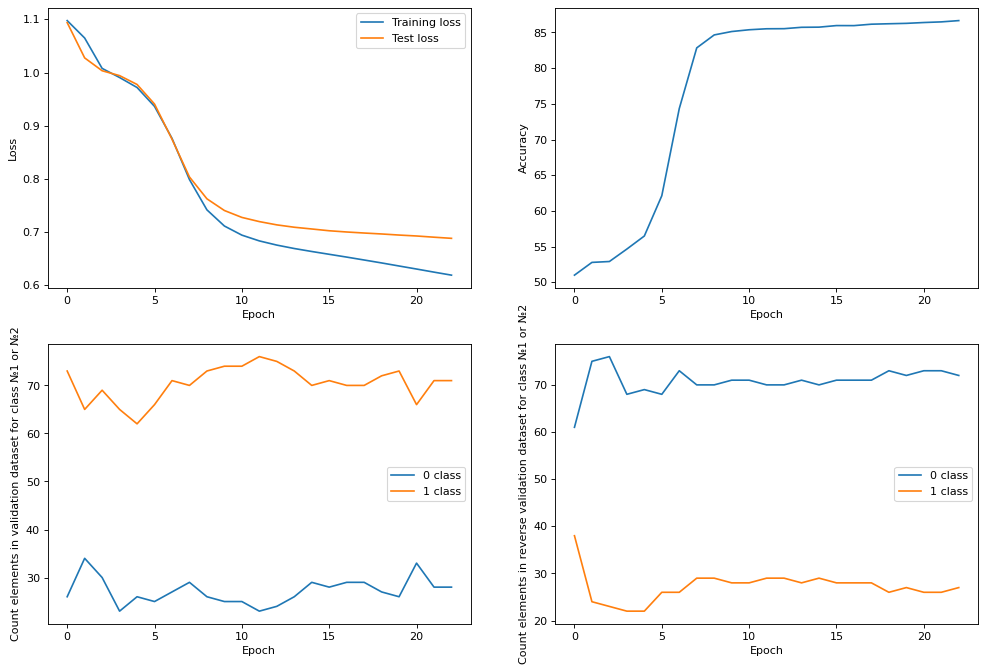

28 71 0
72 27 0


In [139]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from torch.optim.lr_scheduler import ExponentialLR


figure(figsize=(15, 10), dpi=80)

# check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# convert the data to PyTorch tensors
X = torch.tensor(full_embeds, dtype=torch.float32)
y = torch.tensor(randomly_concatenated)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
batch_size = 1024
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1536, 512)
        self.relu1 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU(inplace=True)
        self.fc3 = nn.Linear(256, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# create the MLP model and move it to the device
mlp = MLP().to(device)

# define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)
scheduler = ExponentialLR(optimizer, gamma = 0.95)
# train the model
num_epochs = 23
train_losses = []
test_losses = []
accuracies = []

val_0_class = []
val_1_class = []
val_2_class = []

val_reverse_0_class = []
val_reverse_1_class = []
val_reverse_2_class = []

for epoch in range(num_epochs):
    figure(figsize=(15, 10), dpi=80)
    # train the model
    train_loss = 0.0
    mlp.train()
    for batch_x, batch_y in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}"):
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        pred = mlp(batch_x)
        loss = criterion(pred, batch_y)

        # calculate the gradients and update the weights
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # evaluate the model on the test set
    test_loss = 0.0
    total = 0
    correct = 0
    mlp.eval()
    with torch.no_grad():
        for batch_x, batch_y in test_dataloader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)

            pred = mlp(batch_x)
            loss = criterion(pred, batch_y)

            test_loss += loss.item()

            # calculate accuracy
            _, predicted = torch.max(pred.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    train_losses.append(train_loss / len(train_dataloader))
    test_losses.append(test_loss / len(test_dataloader))
    accuracy = 100.0 * correct / total
    accuracies.append(accuracy)
    clear_output()
    print(f"Epoch {epoch + 1} - Train Loss: {train_losses[-1]:.4f} - Test Loss: {test_losses[-1]:.4f} - Accuracy: {accuracy:.2f}%")
    # plot the training and test losses
    plt.subplot(2, 2, 1)
    plt.plot(train_losses, label="Training loss")
    plt.plot(test_losses, label="Test loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # plot the accuracies
    plt.subplot(2, 2, 2)
    plt.plot(accuracies)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    # display the plot
    
    val_0_class.append((np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 0).sum())
    val_1_class.append((np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 1).sum())
    val_2_class.append((np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 2).sum())

    val_reverse_0_class.append((np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 0).sum())
    val_reverse_1_class.append((np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 1).sum())
    val_reverse_2_class.append((np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 2).sum())
    
    plt.subplot(2, 2, 3)
    plt.plot(val_0_class, label="0 class")
    plt.plot(val_1_class, label="1 class")
    plt.xlabel("Epoch")
    plt.ylabel("Count elements in validation dataset for class №1 or №2")
    plt.legend()
    
    plt.subplot(2, 2, 4)
    plt.plot(val_reverse_0_class, label="0 class")
    plt.plot(val_reverse_1_class, label="1 class")
    plt.xlabel("Epoch")
    plt.ylabel("Count elements in reverse validation dataset for class №1 or №2") 
    plt.legend()
    plt.show()
    
    print((np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 0).sum(),
         (np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 1).sum(),
         (np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 2).sum())
    
    print((np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 0).sum(),
         (np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 1).sum(),
         (np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 2).sum())

In [140]:
((lr.predict(concatenated_val.T) == 0).sum()
,(lr.predict(concatenated_val.T) == 1).sum()
,(lr.predict(concatenated_val.T) == 2).sum())

(12, 45, 42)

In [141]:
((np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 0).sum(),
 (np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 1).sum(),
 (np.argmax(mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy(), axis=1) == 2).sum())


(28, 71, 0)

In [142]:
((np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 0).sum(),
(np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 1).sum(),
(np.argmax(mlp(torch.tensor(concatenated_val_reverse.T).to(device)).cpu().detach().numpy(), axis=1) == 2).sum())

(72, 27, 0)

<AxesSubplot:ylabel='Count'>

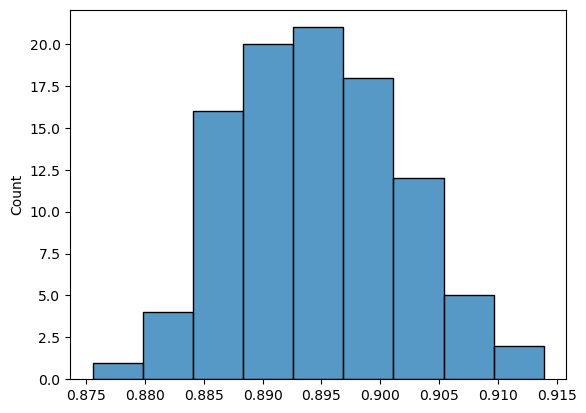

In [143]:
dot_product = np.sum(embeddings_short_val.T * embeddings_long_val.T, axis=1)

# Compute the norms of embeddings_title and embeddings_text
norm_title = np.sqrt(np.sum(embeddings_short_val.T ** 2, axis=1))
norm_text = np.sqrt(np.sum(embeddings_long_val.T ** 2, axis=1))

# Compute the cosine similarity between each pair of embeddings
cos_sim = dot_product / (norm_title * norm_text)

sns.histplot(cos_sim)

<AxesSubplot:ylabel='Count'>

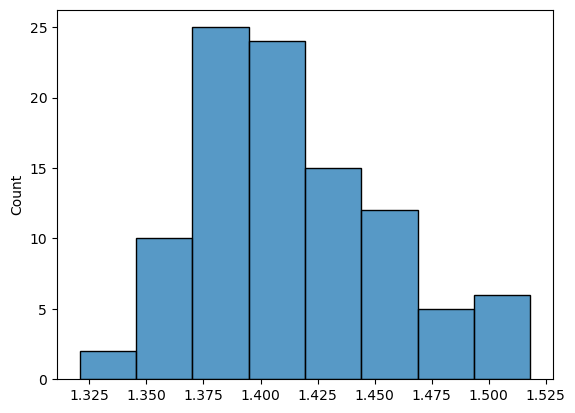

In [144]:
# средняя длина вектора (короткое предложение)768 -- (дополненное информацией предложение)768
sns.histplot(np.linalg.norm(concatenated_val, axis=0))

<AxesSubplot:ylabel='Count'>

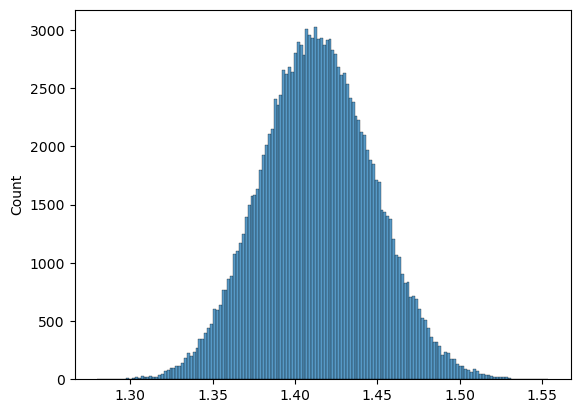

In [145]:
sns.histplot(np.linalg.norm(full_embeds, axis = 1))

In [146]:
x = mlp(torch.tensor(concatenated_val.T).to(device)).cpu().detach().numpy()
x

array([[0.001, 0.999, 0.000],
       [0.996, 0.004, 0.000],
       [0.056, 0.944, 0.000],
       [0.021, 0.979, 0.000],
       [0.004, 0.996, 0.000],
       [0.044, 0.955, 0.001],
       [0.610, 0.390, 0.000],
       [0.987, 0.013, 0.000],
       [0.202, 0.797, 0.001],
       [0.001, 0.999, 0.000],
       [0.897, 0.103, 0.000],
       [0.024, 0.976, 0.000],
       [0.008, 0.992, 0.000],
       [0.053, 0.946, 0.000],
       [0.839, 0.161, 0.000],
       [0.024, 0.976, 0.000],
       [0.963, 0.037, 0.000],
       [0.066, 0.934, 0.000],
       [0.209, 0.791, 0.000],
       [0.840, 0.160, 0.000],
       [0.979, 0.021, 0.000],
       [0.000, 1.000, 0.000],
       [0.654, 0.346, 0.000],
       [0.634, 0.365, 0.001],
       [0.006, 0.994, 0.000],
       [0.992, 0.008, 0.000],
       [0.005, 0.995, 0.000],
       [0.099, 0.901, 0.000],
       [0.007, 0.993, 0.000],
       [0.008, 0.992, 0.000],
       [0.137, 0.863, 0.000],
       [0.160, 0.839, 0.001],
       [0.242, 0.758, 0.000],
       [0.

Довольно интересно, что двоек у нас совсем нет, попробуем дать модели два несравнимых текста:

In [147]:
df_clickbait = pd.read_csv('/kaggle/input/not-clickbait-clickbait/clickbait-not_clickbait.csv', sep=',')

In [148]:
for i in range(100):
    res = []
    rev_res = []
    ans = []
    for index, row in (df_clickbait.iterrows()):
        r = np.random.randint(2)
        if r == 0:
            sentence1 = row[0] # not clickbait
            sentence2 = row[1] # clickbait
            ans.append(0)
        else:
            sentence1 = row[1] # clickbait
            sentence2 = row[0] # not clickbait
            ans.append(1)
        f_embedding = model.encode(sentence1, show_progress_bar=False)
        s_embedding = model.encode(sentence2, show_progress_bar=False)
        res.append(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0].argmax())
        if (mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0].argmax() == 2):
            print(sentence1, sentence2)
    print((np.array(ans) == np.array(res)).sum())
        #print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

Three-year-old boy Colton Burpo spoke about the sensations after clinical death. The boy who returned from the other world told what he saw there.
Which food can makes you pregnant, unbelievable truth! Activated charcoal' makes birth control medicine less effective because it's absorbent.
Unbelievable file on your PC! If you have Mac, then you have paper about Bitcoin in your device memory.
43
Three-year-old boy Colton Burpo spoke about the sensations after clinical death. The boy who returned from the other world told what he saw there.
Activated charcoal' makes birth control medicine less effective because it's absorbent. Which food can makes you pregnant, unbelievable truth!
If you have Mac, then you have paper about Bitcoin in your device memory. Unbelievable file on your PC!
45
Activated charcoal' makes birth control medicine less effective because it's absorbent. Which food can makes you pregnant, unbelievable truth!
If you have Mac, then you have paper about Bitcoin in your devi

KeyboardInterrupt: 

In [ ]:
sentence1 = "Pluto's Christmas Tree -- highest rated Disney movie to watch on a weekend."
sentence2 = "Which Disney Holiday Film Should You Watch This Weekend"

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "On Black Friday, Naked Palettes will be on sale at Beautyjoint with up to 30% off."
sentence2 = "Black Friday is your chance to get the Naked palettes on sale at Beautyjoint."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "Three-year-old boy Colton Burpo spoke about the sensations after clinical death."
sentence2 = "The boy who returned from the other world told what he saw there."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "Kanya Sesser skateboards, surfs and models lingerie all despite having no legs."
sentence2 = "This Lingerie Model Was Born Without Legs And Uses A Skateboard To Get Around"

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "22 Dogs Who Just Found Their Forever Homes."
sentence2 = "22 dogs have been given to families in Liverpool."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "Penny soviet remedy for sore throat."
sentence2 = "Сlove helps with sore throat."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "Famous singer will come to East Europe on tour."
sentence2 = "Sting will visit Moscow and give a concert."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "Famous singer will come to East Europe on tour."
sentence2 = "Sting will visit Moscow and give a concert."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "Famous singer will come to East Europe on tour."
sentence2 = "Sting will visit Moscow and give a concert."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)

print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "The thief killed a man."
sentence2 = "The man died from dangerous pills."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)
print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])
print(mlp(torch.tensor(np.concatenate((s_embedding, f_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "The sign said there was road work ahead so he decided to speed up."
sentence2 = "There was no ice cream in the freezer, nor did they have money to go to the store."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)
print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "The sign said there was road work ahead so he decided to speed up."
sentence2 = "There was no ice cream in the freezer, nor did they have money to go to the store."

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)
print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "I was happy"
sentence2 = "I was very happy and proud to be part of this event"

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)
print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "The big red button placed here"
sentence2 = "The small green indicator pulsing here"

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)
print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [ ]:
sentence1 = "The big red button placed here"
sentence2 = "The small green indicator pulsing here"

f_embedding = model.encode(sentence1)
s_embedding = model.encode(sentence2)
print(mlp(torch.tensor(np.concatenate((f_embedding, s_embedding)).reshape((1, 1536))).to(device)).cpu().detach().numpy()[0])

In [84]:
res = np.array(res)
rev_res = np.array(rev_res)

In [85]:
((res.argmax(axis = 1)== 0).sum(),
(res.argmax(axis = 1)== 1).sum(),
(res.argmax(axis = 1)== 2).sum())

(44, 52, 4)

In [86]:
((rev_res.argmax(axis = 1)== 0).sum(),
(rev_res.argmax(axis = 1)== 1).sum(),
(rev_res.argmax(axis = 1)== 2).sum())

(58, 37, 5)

In [87]:
res

array([[0.007, 0.993, 0.001],
       [0.114, 0.885, 0.001],
       [0.064, 0.936, 0.000],
       [0.335, 0.664, 0.000],
       [0.048, 0.951, 0.001],
       [0.530, 0.469, 0.001],
       [0.078, 0.919, 0.003],
       [0.067, 0.930, 0.003],
       [0.777, 0.188, 0.035],
       [0.780, 0.191, 0.029],
       [0.344, 0.363, 0.293],
       [0.049, 0.946, 0.005],
       [0.201, 0.239, 0.561],
       [0.844, 0.095, 0.061],
       [0.314, 0.685, 0.000],
       [0.802, 0.187, 0.011],
       [0.013, 0.981, 0.005],
       [0.312, 0.642, 0.046],
       [0.786, 0.188, 0.026],
       [0.733, 0.267, 0.000],
       [0.745, 0.119, 0.137],
       [0.192, 0.201, 0.608],
       [0.667, 0.250, 0.083],
       [0.305, 0.690, 0.005],
       [0.533, 0.464, 0.002],
       [0.130, 0.856, 0.014],
       [0.413, 0.541, 0.046],
       [0.104, 0.892, 0.005],
       [0.455, 0.542, 0.004],
       [0.165, 0.832, 0.003],
       [0.382, 0.351, 0.268],
       [0.535, 0.463, 0.002],
       [0.492, 0.486, 0.021],
       [0.